In [1]:
import pandas as pd
from datetime import datetime 

import numpy as np

import datetime as dt

import folium
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# from functions import *
from functions import fun as f

%load_ext autoreload
%autoreload 2

/home/vincent/anaconda3/envs/test_suneris_vgigliobianco/lib/python3.6/site-packages/pysal/lib/weights/util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')
/home/vincent/anaconda3/envs/test_suneris_vgigliobianco/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [68]:
df1 = pd.read_csv("data/df1.csv")
df2 = pd.read_csv("data/df2.csv")
df3 = pd.read_csv("data/df3.csv")
df4 = pd.read_csv("data/df4.csv")
df5 = pd.read_csv("data/df5.csv")
df6 = pd.read_csv("data/df6.csv")

Création d'un seul dataframe rassemblant toutes les données

In [69]:
df = pd.concat([df1,df2,df3,df4,df5,df6])

In [70]:
df.shape

(1175842, 5)

In [71]:
df.head()

,Unnamed: 0,id,lat,long,ts
0,1,66,48.846460,2.306055,1556661600
1,2,66,48.846442,2.306054,1556661640
2,3,66,48.846465,2.306093,1556661690
3,4,66,48.846485,2.306105,1556661740
4,5,66,48.846450,2.306070,1556661880


On voit que le dataset total comprend 1 175 842 observations    

Suppression de la 1ère colonne "index" du dataframe

In [72]:
df = df.drop(list(df)[0], axis = 1)

<br>

**Question 1: quelles sont les étapes du trajet du véhicule n°78 lors de la journée du 2 mai?**

In [73]:
df["date_and_time"] = df["ts"].map(lambda x:datetime.fromtimestamp(x))
df['year'] = df['date_and_time'].dt.year 
df['month'] = df['date_and_time'].dt.month 
df['day'] = df['date_and_time'].dt.day 

df['hour'] = df['date_and_time'].dt.hour 
df['min'] = df['date_and_time'].dt.minute
df['sec'] = df['date_and_time'].dt.second

On considère le véhicule avec l'id n°78

In [74]:
df_id_78 = df[(df["id"] == 78) & (df["year"] == 2019) & (df["month"] == 5) & (df["day"] == 2)]

Ci-dessous, la visualisation de tous les couples de latitude, longitude pour le véhicule n°78

In [75]:
points = [(row.lat,row.long) for row in df_id_78.itertuples()]
my_map = folium.Map(location = points[0], zoom_start=12)
folium.PolyLine(points,color = "red").add_to(my_map)
display(my_map)

On voit que le véhicule n°78 lors de ses déplacements, passe par:
- quartier Arts et Métiers
- rue de Rivoli
- Champs Elysées
- demi-tour à hauteur de rue de la Boétie
- rue du Faubourg Saint Honoré
- passage par La Madeleine + Opéra + Bourse + rue Réaumur
- quartier Arts et Métiers<br> 
<br> 

Mais il convient de définir exactement quand le véhicule a effectué ces déplacements.<br>
Comme le trajet du véhicule n°78 est un trajet qui constitue une boucle, on peut se demander si le véhicule fait des poses et reste par moments immobile

On crée un vecteur contenant la vitesse entre deux points consécutifs<br>
On peut tracer sa vitesse au cours du temps t

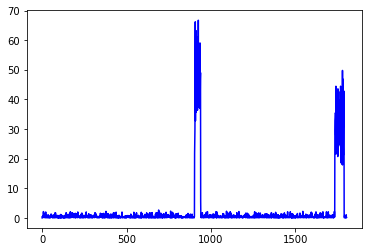

In [76]:
all_ts = [each for each in df_id_78.ts]
durees = [(all_ts[i] - all_ts[i-1])/3600 for i in range(0,len(all_ts))]

all_pts = []
for row in df_id_78.itertuples():
    all_pts.append((row.lat, row.long))
    
distances = [geodesic(all_pts[i],all_pts[i-1]).kilometers for i in range(0,len(all_pts))]
vitesses = [distances[i]/durees[i] for i in range(0,len(distances))]
         
t = [each for each in range(0,len(all_ts))]
plt.plot(t,vitesses,color='blue')
plt.xticks(np.arange(0, 1804, step=500))
plt.show()

Identifions ces pics de vitesse : on peut considérer qu'une vitesse est élevée lorsqu'elle est supérieure à 20 km/h

In [77]:
id_ts_pic_vitesses = []
id_ts = 0
for each in vitesses:
    if each >=20:
        id_ts_pic_vitesses.append(id_ts)
    id_ts += 1

In [78]:
id_ts_pic_vitesses

[903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920,
 921,
 922,
 923,
 924,
 925,
 926,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 1734,
 1735,
 1736,
 1737,
 1738,
 1739,
 1740,
 1741,
 1742,
 1743,
 1744,
 1745,
 1746,
 1747,
 1748,
 1749,
 1750,
 1751,
 1752,
 1753,
 1754,
 1755,
 1756,
 1757,
 1758,
 1759,
 1760,
 1761,
 1762,
 1763,
 1764,
 1765,
 1766,
 1767,
 1768,
 1770,
 1771,
 1772,
 1773,
 1774,
 1776,
 1777,
 1779,
 1781,
 1782,
 1783,
 1784,
 1785,
 1786,
 1787,
 1788]

On voit que la vitesse est supérieure à 5 km/h lorsque:
- les identifiants des timestamps sont compris entre 903 et 938<br>
- et lorsque les identifiants des timestamps sont compris entre 1734 et 1788 

Ci-dessous, les dates correspondant aux identifiants de timestamps 0, 903, 938, 1734, 1788 et la date correspondant au dernier timestamp du véhicule n°78

In [79]:
df_id_78[df_id_78["ts"].isin([all_ts[0],all_ts[903],all_ts[938],all_ts[1734],all_ts[1788],all_ts[len(all_ts)-1]])]

,id,lat,long,ts,date_and_time,year,month,day,hour,min,sec
69616,78,48.869056,2.297370,1556748000,2019-05-02 00:00:00,2019,5,2,0,0,0
70519,78,48.868362,2.298619,1556793090,2019-05-02 12:31:30,2019,5,2,12,31,30
70554,78,48.865636,2.355413,1556793440,2019-05-02 12:37:20,2019,5,2,12,37,20
71350,78,48.865022,2.354203,1556832910,2019-05-02 23:35:10,2019,5,2,23,35,10
71404,78,48.869101,2.297463,1556833450,2019-05-02 23:44:10,2019,5,2,23,44,10
71419,78,48.869078,2.297439,1556834350,2019-05-02 23:59:10,2019,5,2,23,59,10


On peut alors visualiser les différentes étapes du trajet du véhicule 

In [80]:
points = [(row.lat,row.long) for row in df_id_78.itertuples()]

Ci-dessous, **l'étape n°1** correspondant aux dates comprises entre 2019-05-02 00:00:00 et 2019-05-02 12:31:30

In [81]:
map = folium.Map(location= points[0], zoom_start=12)
for i in range(0,903):
    folium.Marker(location = points[i], icon=folium.Icon(color='red')).add_to(map)
(map)

On voit sur le graphe ci-dessus que pour cette **étape n°1**, le véhicule reste à proximité de la rue Jean Giraudoux

Ci-dessous, **l'étape n°2** correspondant aux dates comprises entre 2019-05-02 12:31:30 et 2019-05-02 12:37:20

In [82]:
my_map = folium.Map(location = points[0], zoom_start=12)
folium.PolyLine(points[903:938], color = "red").add_to(my_map)
display(my_map)

Lors de **l'étape n°2**, le véhicule se déplace du quartier des Champs Elysées, en passant par rue du Faubourg Saint Honoré, Madeleine, Bourse puis rue Réaumur<br>
et atteindre le quartier des Arts et Métiers

Ci-dessous, **l'étape n°3** correspondant aux dates comprises entre 2019-05-02 12:37:20 et 2019-05-02 23:35:10

In [83]:
map = folium.Map(location= points[0], zoom_start=12)
for i in range(938,1734):
    folium.Marker(location = points[i],icon=folium.Icon(color='red')).add_to(map)
(map)

On voit sur le graphe ci-dessus que pour **l'étape n°3**, le véhicule s'est très peu déplacé et est resté à proximité de Réaumur Sébastopol et rue Turbigo:<br>
Le véhicule est donc resté proche du quartier des Arts et Métiers, entre 2019-05-02 12:37:20 et 2019-05-02 23:35:10

Ci-dessous, **l'étape n°4** correspondant aux dates comprises entre 2019-05-02 23:35:10 et 2019-05-02 23:44:10

In [84]:
my_map = folium.Map(location = points[0], zoom_start=12)
folium.PolyLine(points[1734:1788],color = "red").add_to(my_map)
display(my_map)

Cette **étape n°4** correspond à son trajet retour entre 2019-05-02 23:35:10 et 2019-05-02 23:44:10<br>
<br>
Cette fois, pour le trajet retour, il est passé  par :
- rue de Turbigo
- rue Etienne Marcel
- rue du Louvre
- rue de Rivoli 
- les Champs Elysées 

Enfin, les derniers timestamps ci-dessous, indiquent que le véhicule est resté proche de la rue Jean Giraudoux et du quartier des Champs Elysées<br>
entre 2019-05-02 23:44:10 et 2019-05-02 23:59:10<br>
Ceci correspond à **l'étape n°5**             

In [85]:
map = folium.Map(location= points[0], zoom_start=12)
for i in range(1788,len(points)):
    folium.Marker(location = points[i],icon=folium.Icon(color='red')).add_to(map)
display(map)

<br>

**Solution analytique**:
ci-dessous, nouvelle fonction:
- NB) seuil de vitesse considéré = 5 km/h
- de flaguer chaque timestamp à 0 ou à 1 pour indiquer si la vitesse est élevée ou faible
- de créer un dataframe avec une colonne identifiant (nombre entier) les différents intervalles de temps à vitesse faible ou élevée 

In [86]:
def df_with_low_high_vitesse(df,flag_value):

    all_ts = [each for each in df.ts]

    durees = [(all_ts[i] - all_ts[i-1])/3600 for i in range(0,len(all_ts))]

    all_pts = []
    for row in df.itertuples():
        all_pts.append((row.lat, row.long))
    
    distances = [geodesic(all_pts[i],all_pts[i-1]).kilometers for i in range(0,len(all_pts))]
    vitesses = [distances[i]/durees[i] for i in range(0,len(distances))]   

    # seuil de vitesse
    seuil = 5
    
    # On flague chaque timestamp à 0 ou à 1 pour indiquer si la vitesse est élevée ou faible
    ts_flag_vitesses = {}
    for each in zip(all_ts,vitesses):
        if each[1] >= seuil:
            ts_flag_vitesses[each[0]] = 0
        else:
            ts_flag_vitesses[each[0]] = 1

    df_flag_vitesses = pd.DataFrame.from_dict(ts_flag_vitesses,orient = 'index', columns = ["flag"])
    df_flag_vitesses["ts"] = df_flag_vitesses.index

    liste_value_interval = []
    first_value_added = False
   
    value_interval = 1
    if flag_value == 1:
        compl_flag_value = 0
    else:
        compl_flag_value = 1
        
    # Création du dataframe avec une colonne identifiant (nombre entier) 
    # les différents intervalles de temps à vitesse faible ou élevée 
    for row in df_flag_vitesses.itertuples():
  
        #if row.flag == 1 and first_value_added == False:
        if row.flag == flag_value and first_value_added == False:
            liste_value_interval.append(value_interval)
        #elif row.flag == 0 and first_value_added == False:
        elif row.flag == compl_flag_value and first_value_added == False:
            first_value_added = True
            value_interval += 1
        #elif row.flag == 1 and first_value_added == True:
        elif row.flag == flag_value and first_value_added == True:
            liste_value_interval.append(value_interval)
            first_value_added = False 

    df_with_vitesse = df_flag_vitesses[df_flag_vitesses["flag"] == flag_value]

    df_with_vitesse["value_interval"] = liste_value_interval
    
    df_with_vitesse = df_with_vitesse.reset_index(drop=True)

    return df_with_vitesse

In [87]:
df_low_vitesse = df_with_low_high_vitesse(df_id_78,1)

/home/vincent/anaconda3/envs/test_suneris_vgigliobianco/lib/python3.6/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [88]:
df_high_vitesse = df_with_low_high_vitesse(df_id_78,0)

/home/vincent/anaconda3/envs/test_suneris_vgigliobianco/lib/python3.6/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [89]:
df_low_vitesse.sample(n=5)

,flag,ts,value_interval
393,1,1556766660,1
1666,1,1556831420,2
459,1,1556770510,1
1046,1,1556799820,2
485,1,1556771950,1


In [90]:
df_high_vitesse.sample(n=5)

,flag,ts,value_interval
15,0,1556793240,2
86,0,1556833400,3
49,0,1556833030,3
39,0,1556832930,3
89,0,1556833430,3


In [91]:
def get_min_max_ts_low_high_speed(df):
    resultat = []
    for each_value in list(df["value_interval"].unique()):
        resultat_temp = []
        resultat_temp.append(each_value)
        resultat_temp.append((df[df["value_interval"] == each_value]["ts"].min()))
        resultat_temp.append((df[df["value_interval"] == each_value]["ts"].max()))
        resultat.append(resultat_temp)
                             
    return resultat      

In [92]:
liste_intervals_ts_low_vitesse = get_min_max_ts_low_high_speed(df_low_vitesse)
liste_intervals_ts_high_vitesse = get_min_max_ts_low_high_speed(df_high_vitesse)

- Détermination des intervalles de temps où la vitesse est faible
- Map des points correspondant aux intervalles où la vitesse est faible

In [93]:
liste_intervals_ts_low_vitesse

[[1, 1556748000, 1556793070],
 [2, 1556793600, 1556832900],
 [3, 1556833570, 1556834350]]

In [94]:
points = [(row.lat,row.long) for row in df_id_78.itertuples()]
all_ts = [each for each in df_id_78.ts]
t = [each for each in range(0,len(all_ts))]

dict_ts_to_id = {}
for each in zip(all_ts,t):
    dict_ts_to_id[each[0]] = each[1]

In [95]:
map = folium.Map(location= points[0], zoom_start=12)
k = 0
color_values = ['red', 'blue','green']
for each in liste_intervals_ts_low_vitesse:
    k += 1
    id_min = dict_ts_to_id[each[1]]
    id_max = dict_ts_to_id[each[2]]
    
    print ("timestamps: ", datetime.fromtimestamp(each[1]),"et",datetime.fromtimestamp(each[2]))
    for i in range(id_min,id_max):
        folium.Marker(location = points[i], icon=folium.Icon(color=color_values[k-1])).add_to(map)
    if k == len(liste_intervals_ts_low_vitesse):
        display(map)
    del id_min,id_max

timestamps:  2019-05-02 00:00:00 et 2019-05-02 12:31:10
timestamps:  2019-05-02 12:40:00 et 2019-05-02 23:35:00
timestamps:  2019-05-02 23:46:10 et 2019-05-02 23:59:10


- Détermination des intervalles de temps où la vitesse est élevée
- Map des trajets avec intervalles où la vitesse est élevée

In [96]:
my_map = folium.Map(location= points[0], zoom_start=12)
k = 0
color_values = ['red', 'blue']
for each in liste_intervals_ts_high_vitesse:
    k += 1
    id_min = dict_ts_to_id[each[1]]
    id_max = dict_ts_to_id[each[2]]
    
    #print (id_min, id_max)
    #print (color_values[k-1])

    print ("timestamps: ", datetime.fromtimestamp(each[1]),"et",datetime.fromtimestamp(each[2]))
    for i in range(id_min,id_max):
        folium.PolyLine(points[id_min:id_max],color=color_values[k-1]).add_to(my_map)
    if k == len(liste_intervals_ts_high_vitesse):
        display(my_map)

timestamps:  2019-05-02 12:31:30 et 2019-05-02 12:38:20
timestamps:  2019-05-02 23:35:10 et 2019-05-02 23:44:10


**Question 2: quel est, à priori, le garage principal du véhicule n°57?**

In [97]:
df[df["id"] == 57].head()

,id,lat,long,ts,date_and_time,year,month,day,hour,min,sec
52666,57,43.597116,1.443342,1556661660,2019-05-01 00:01:00,2019,5,1,0,1,0
52667,57,43.597119,1.443341,1556661740,2019-05-01 00:02:20,2019,5,1,0,2,20
52668,57,43.597125,1.443347,1556661750,2019-05-01 00:02:30,2019,5,1,0,2,30
52669,57,43.597093,1.443387,1556661770,2019-05-01 00:02:50,2019,5,1,0,2,50
52670,57,43.597126,1.443369,1556661810,2019-05-01 00:03:30,2019,5,1,0,3,30


Un "garage" peut être identifié comme une localisation qui doit être visible pour chaque jour

Les trajets du véhicule pour chaque jour, peuvent être superposés, de manière à identifier un garage<br>
comme étant un point commun aux cinq trajets correspondant à chaque jour, c'est-à-dire au 01/05/2019, 02/05/2019, 03/05/2019, 04/05/2019 et 05/05/2019

In [98]:
df_id_57_day_1 = df[(df["id"] == 57) & (df["year"] == 2019) & (df["month"] == 5) & (df["day"] == 1)]
df_id_57_day_2 = df[(df["id"] == 57) & (df["year"] == 2019) & (df["month"] == 5) & (df["day"] == 2)]
df_id_57_day_3 = df[(df["id"] == 57) & (df["year"] == 2019) & (df["month"] == 5) & (df["day"] == 3)]
df_id_57_day_4 = df[(df["id"] == 57) & (df["year"] == 2019) & (df["month"] == 5) & (df["day"] == 4)]
df_id_57_day_5 = df[(df["id"] == 57) & (df["year"] == 2019) & (df["month"] == 5) & (df["day"] == 5)]
points_1 = [(row.lat,row.long) for row in df_id_57_day_1.itertuples()]
points_2 = [(row.lat,row.long) for row in df_id_57_day_2.itertuples()]
points_3 = [(row.lat,row.long) for row in df_id_57_day_3.itertuples()]
points_4 = [(row.lat,row.long) for row in df_id_57_day_4.itertuples()]
points_5 = [(row.lat,row.long) for row in df_id_57_day_5.itertuples()]
my_map = folium.Map(location = points_1[0], zoom_start=12)
folium.PolyLine(points_1,color = "red").add_to(my_map)
folium.PolyLine(points_2,color = "blue").add_to(my_map)
folium.PolyLine(points_3,color = "orange").add_to(my_map)
folium.PolyLine(points_4,color = "green").add_to(my_map)
folium.PolyLine(points_5,color = "black").add_to(my_map)
display(my_map)

En superposant les trajets de chaque jour du véhicule n°57, nous constatons que les trajets du véhicule ont lieu dans la ville de Toulouse<br>
On s'aperçoit qu'il y a une convergence de tous les trajets vers une localisation<br>

Ci-dessous, une copie d'écran de cette localisation, obtenue en zoomant sur cette zone:

<img src = "img/localisation_garage.png">

On peut maintenant considérer un trajet, par exemple celui du jour n°1

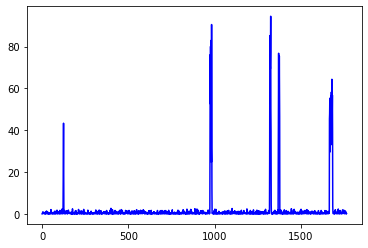

In [99]:
all_ts = [each for each in df_id_57_day_1.ts]
durees = [(all_ts[i] - all_ts[i-1])/3600 for i in range(0,len(all_ts))]

all_pts = []
for row in df_id_57_day_1.itertuples():
    all_pts.append((row.lat, row.long))
distances = [geodesic(all_pts[i],all_pts[i-1]).kilometers for i in range(0,len(all_pts))]
vitesses = [distances[i]/durees[i] for i in range(0,len(distances))]
t = [each for each in range(0,len(all_ts))]
plt.plot(t,vitesses, color = 'blue')
plt.xticks(np.arange(0, len(all_ts), step=500))
plt.show()

Ci-dessous des points correspondant à des localisations où la vitesse du véhicule est faible<br>
Remarque: j'ai considéré seulement 4 points situés dans les intervalles où la vitesse est faible<br>
Mais il y a en fait 6 intervalles donc 6 points qu'on peut choisir

In [100]:
df_id_57_day_1.shape

(1767, 11)

In [101]:
df_id_57_day_1[df_id_57_day_1["ts"].isin([all_ts[50],all_ts[500],all_ts[1100],all_ts[1500]])]
#df_id_57_day_1[df_id_57_day_1["ts"].isin([all_ts[50],all_ts[500],all_ts[1100],all_ts[1500],all_ts[len(all_ts) -1]])]

,id,lat,long,ts,date_and_time,year,month,day,hour,min,sec
52716,57,43.597086,1.443379,1556664610,2019-05-01 00:50:10,2019,5,1,0,50,10
53166,57,43.593613,1.443912,1556687040,2019-05-01 07:04:00,2019,5,1,7,4,0
53766,57,43.605331,1.437606,1556716760,2019-05-01 15:19:20,2019,5,1,15,19,20
54166,57,43.611248,1.430932,1556736000,2019-05-01 20:40:00,2019,5,1,20,40,0


On peut alors visualiser sur le graphe ci-dessous, les quatres différentes localisations possibles du "garage principal" 

In [102]:
points = [(row.lat,row.long) for row in df_id_57_day_1.itertuples()]

In [103]:
map = folium.Map(location= points[0], zoom_start=12)
folium.Marker(location = points[50],icon=folium.Icon(color='green')).add_to(map) 
folium.Marker(location = points[500],icon=folium.Icon(color='red')).add_to(map)
folium.Marker(location = points[1100],icon=folium.Icon(color='blue')).add_to(map)
folium.Marker(location = points[1500],icon=folium.Icon(color='orange')).add_to(map)
(map)

En zoomant, on s'aperçoit que c'est la localisation avec le marqueur vert (et le marqueur violet) qui coïncide avec le garage identifié grâce au graphe précédent qui superpose tous les trajets<br>
<br>
Les coordonnées du point du garage principal pour le véhicule n°57 sont:<br>

In [104]:
# J'ai fait une erreur 
# au lieu de :print (points[500])
# c'est:
print (points[50])

(43.5970864923215, 1.4433792435954198)


Le garage principal pour le véhicule n°57 a donc pour latitude et longitude :<br>

In [105]:
        #- latitude : 43.593613266617005
        #- longitude : 1.44391168173437

        - latitude: 43.5970864923215
        - longitude: 1.4433792435954198
            
Ce garage principal est situé à Toulouse à l'intersection de la rue Saint Jean / rue des Prêtres et de la rue Saint Rémésy

**Solution analytique**:<br>
- trouver les intervalles de timestamps durant lesquels le véhicule ne se déplace pas<br> 
  Seuil de vitesse choisi = 5 km/h
- une fois trouvés ces intervalles pour chaque jour, tirer au hasard un représentant ie un timestamp appartenant à ces intervalles<br>
  mis sous la forme d'une localisation (latitude, longitude)
    
On a alors:<br>

  - jour n°1: repres_1, repres_2, ..., repres_k<br>
  - jour n°2: repres_1, repres_2, ..., repres_l<br>
  - jour n°3: repres_1, repres_2, ..., repres_m<br>
  - jour n°4: repres_1, repres_2, ..., repres_n<br>
  - jour n°5: repres_1, repres_2, ..., repres_o<br>
    
On prend tous les répresentants du jour n° 1:<br>
    - lancement de KDTree: obtention des points voisins de chaque représentant du jour n°1<br>
    - le garage est alors obtenu grâce au représentant qui possède tous ses points voisins<br>
    qui appartiennent aux trajets des jours n°2,3, 4 et 5

On considère le jour n°1

In [106]:
df_id_57_day_1.head()

,id,lat,long,ts,date_and_time,year,month,day,hour,min,sec
52666,57,43.597116,1.443342,1556661660,2019-05-01 00:01:00,2019,5,1,0,1,0
52667,57,43.597119,1.443341,1556661740,2019-05-01 00:02:20,2019,5,1,0,2,20
52668,57,43.597125,1.443347,1556661750,2019-05-01 00:02:30,2019,5,1,0,2,30
52669,57,43.597093,1.443387,1556661770,2019-05-01 00:02:50,2019,5,1,0,2,50
52670,57,43.597126,1.443369,1556661810,2019-05-01 00:03:30,2019,5,1,0,3,30


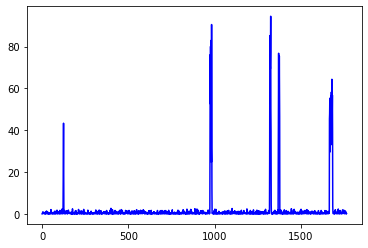

In [107]:
all_ts = [each for each in df_id_57_day_1.ts]
durees = [(all_ts[i] - all_ts[i-1])/3600 for i in range(0,len(all_ts))]

all_pts = []
for row in df_id_57_day_1.itertuples():
    all_pts.append((row.lat, row.long))
    
distances = [geodesic(all_pts[i],all_pts[i-1]).kilometers for i in range(0,len(all_pts))]
vitesses = [distances[i]/durees[i] for i in range(0,len(distances))]

t = [each for each in range(0,len(all_ts))]
plt.plot(t,vitesses, color = 'blue')
plt.xticks(np.arange(0, len(all_ts), step=500))
plt.show()

Pour le jour n°1, on constate la présence de 6 intervalles avec des vitesses faibles<br>

In [108]:
def repres_each_day(df):

    all_ts = [each for each in df.ts]

    durees = [(all_ts[i] - all_ts[i-1])/3600 for i in range(0,len(all_ts))]

    all_pts = []
    for row in df.itertuples():
        all_pts.append((row.lat, row.long))
    
    distances = [geodesic(all_pts[i],all_pts[i-1]).kilometers for i in range(0,len(all_pts))]
    vitesses = [distances[i]/durees[i] for i in range(0,len(distances))]   

    # seuil de vitesse égal à 5 km/h
    seuil = 5
    ts_flag_vitesses = {}
    for each in zip(all_ts,vitesses):
        if each[1] >= seuil:
            ts_flag_vitesses[each[0]] = 0
        else:
            ts_flag_vitesses[each[0]] = 1

    df_flag_vitesses = pd.DataFrame.from_dict(ts_flag_vitesses,orient = 'index', columns = ["flag"])
    df_flag_vitesses["ts"] = df_flag_vitesses.index

    liste_value_interval = []
    first_value_added = False
    value_interval = 1
    for row in df_flag_vitesses.itertuples():
  
        if row.flag == 1 and first_value_added == False:
            liste_value_interval.append(value_interval)
        elif row.flag == 0 and first_value_added == False:
            first_value_added = True
            value_interval += 1
        elif row.flag == 1 and first_value_added == True:
            liste_value_interval.append(value_interval)
            first_value_added = False 

            
    # Dataframe avec colonnes = timestamps du trajet où la vitesse est faible
    df_with_low_vitesse = df_flag_vitesses[df_flag_vitesses["flag"] == 1]
    # On ajoute le numéro d'intervalle 
    df_with_low_vitesse["value_interval"] = liste_value_interval

    
    # On tire un représentant pour chaque intervalle où la vitesse est faible
    repres_each_day = []

    k = 1
    for each in list(df_with_low_vitesse["value_interval"].unique()):
        df_temp = df_with_low_vitesse[df_with_low_vitesse["value_interval"] == k]
        
        # random ts = réprésentant on tire au hasard une ligne de df_temp
        # et on récupère son ts
        random_index = np.random.randint(df_temp.shape[0],size = 1)
        ts_of_repres = df_temp.iloc[[random_index[0]]]["ts"].values[0]
        repres_each_day.append(ts_of_repres)
       
        k += 1

    return repres_each_day

Extraction des représentants pour chaque jour

In [109]:
repres_day_1 = repres_each_day(df_id_57_day_1)
repres_day_2 = repres_each_day(df_id_57_day_2)
repres_day_3 = repres_each_day(df_id_57_day_3)
repres_day_4 = repres_each_day(df_id_57_day_4)
repres_day_5 = repres_each_day(df_id_57_day_5)

/home/vincent/anaconda3/envs/test_suneris_vgigliobianco/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Création d'une liste contenant tous les représentants

In [110]:
all_ts_repres_before_kdtree = []
for each in repres_day_1:
    all_ts_repres_before_kdtree.append((each,1))
for each in repres_day_2:
    all_ts_repres_before_kdtree.append((each,2))
for each in repres_day_3:
    all_ts_repres_before_kdtree.append((each,3))
for each in repres_day_4:
    all_ts_repres_before_kdtree.append((each,4))
for each in repres_day_5:
    all_ts_repres_before_kdtree.append((each,5))

In [111]:
all_ts_repres_before_kdtree

[(1556664570, 1),
 (1556685550, 1),
 (1556725280, 1),
 (1556727910, 1),
 (1556733950, 1),
 (1556747500, 1),
 (1556748010, 2),
 (1556748290, 2),
 (1556748840, 2),
 (1556771090, 2),
 (1556800020, 2),
 (1556836610, 3),
 (1556844290, 3),
 (1556850410, 3),
 (1556858050, 3),
 (1556895480, 3),
 (1556909410, 3),
 (1556935360, 4),
 (1556958550, 4),
 (1556963390, 4),
 (1557004370, 4),
 (1557006420, 4),
 (1557009040, 5),
 (1557012230, 5),
 (1557025400, 5),
 (1557035800, 5),
 (1557090850, 5)]

In [112]:
df_id_57 = df[(df["id"] == 57)]

In [113]:
df_id_57.head()

,id,lat,long,ts,date_and_time,year,month,day,hour,min,sec
52666,57,43.597116,1.443342,1556661660,2019-05-01 00:01:00,2019,5,1,0,1,0
52667,57,43.597119,1.443341,1556661740,2019-05-01 00:02:20,2019,5,1,0,2,20
52668,57,43.597125,1.443347,1556661750,2019-05-01 00:02:30,2019,5,1,0,2,30
52669,57,43.597093,1.443387,1556661770,2019-05-01 00:02:50,2019,5,1,0,2,50
52670,57,43.597126,1.443369,1556661810,2019-05-01 00:03:30,2019,5,1,0,3,30


On définit les (latitude, longitude) des représentants pour le jour n°1

In [114]:
locations_repres_day_1 = []
for row in df_id_57[df_id_57["ts"].isin(repres_day_1)][["lat", "long"]].itertuples():
    locations_repres_day_1.append((row.lat,row.long))

In [115]:
locations_repres_day_1

[(43.597085704048794, 1.4433287348852),
 (43.5936137538377, 1.4439480626817802),
 (43.6053201366568, 1.43760530317646),
 (43.608912860829705, 1.4413124810998001),
 (43.61120252947129, 1.43092438610579),
 (43.5971104196281, 1.44333506529442)]

On définit les (latitude, longitude) des représentants de tous les jours

In [116]:
liste_of_ts = [each[0] for each in all_ts_repres_before_kdtree]

In [117]:
locations_all_repres = []
for row in df_id_57[df_id_57["ts"].isin(liste_of_ts)][["lat", "long"]].itertuples():
    locations_all_repres.append((row.lat,row.long))

Lancement de KDTree: obtention des points voisins de chaque représentant du jour n°1<br>
"epsilon" vaut 5 mètres  

In [118]:
locations_repres_day_1

[(43.597085704048794, 1.4433287348852),
 (43.5936137538377, 1.4439480626817802),
 (43.6053201366568, 1.43760530317646),
 (43.608912860829705, 1.4413124810998001),
 (43.61120252947129, 1.43092438610579),
 (43.5971104196281, 1.44333506529442)]

In [119]:
locations_all_repres

[(43.597085704048794, 1.4433287348852),
 (43.5936137538377, 1.4439480626817802),
 (43.6053201366568, 1.43760530317646),
 (43.608912860829705, 1.4413124810998001),
 (43.61120252947129, 1.43092438610579),
 (43.5971104196281, 1.44333506529442),
 (43.59713421460749, 1.4433284125611898),
 (43.5947287596344, 1.44502005371216),
 (43.611157911846504, 1.4293445666874298),
 (43.5997545616543, 1.42693298998777),
 (43.59710307293489, 1.4433706611368),
 (43.59710101642239, 1.44335234499656),
 (43.596700128608106, 1.4284768321341599),
 (43.605456387694, 1.42552023910403),
 (43.5965302401178, 1.42401089432606),
 (43.5904853211116, 1.4366886854582097),
 (43.5971386649864, 1.4433334605159198),
 (43.5971151594776, 1.44334451221193),
 (43.5920660425502, 1.44463508302031),
 (43.5892955848019, 1.44594614585525),
 (43.612276763073204, 1.42522962630095),
 (43.597105395365105, 1.44333404626355),
 (43.5971344359614, 1.44338284298985),
 (43.601352826714, 1.42937372658525),
 (43.603732145481395, 1.43599031093281

In [120]:
import pysal
locations_garage = []

epsilon_param = 0.005 # epsilon vaut 5 mètres
tree = pysal.lib.cg.kdtree.KDTree(locations_all_repres, distance_metric='Arc', radius=pysal.lib.cg.RADIUS_EARTH_KM)

# Boucle pour chaque représentant du jour n°1
for each in locations_repres_day_1:
    
    locations_temp = []
    locations_temp.append(each)
    indices = tree.query_ball_point(each, epsilon_param)
    
    
    print ("\nPoints voisins de :", each)
    for j in indices:
        if each != locations_all_repres[j] and locations_all_repres[j] not in locations_temp:
            print (locations_all_repres[j])
            locations_temp.append(locations_all_repres[j])
                                                                    
    if len(locations_temp) > 1:
        locations_garage.append(locations_temp)


Points voisins de : (43.597085704048794, 1.4433287348852)
(43.5971104196281, 1.44333506529442)
(43.59710101642239, 1.44335234499656)
(43.5971151594776, 1.44334451221193)
(43.597105395365105, 1.44333404626355)

Points voisins de : (43.5936137538377, 1.4439480626817802)

Points voisins de : (43.6053201366568, 1.43760530317646)

Points voisins de : (43.608912860829705, 1.4413124810998001)

Points voisins de : (43.61120252947129, 1.43092438610579)

Points voisins de : (43.5971104196281, 1.44333506529442)
(43.597085704048794, 1.4433287348852)
(43.59713421460749, 1.4433284125611898)
(43.59710307293489, 1.4433706611368)
(43.59710101642239, 1.44335234499656)
(43.5971151594776, 1.44334451221193)
(43.597105395365105, 1.44333404626355)
(43.597105708565394, 1.44336979390703)
(43.5971386649864, 1.4433334605159198)


Il y a deux listes de points obtenues contenues dans "locations_garage":

In [121]:
locations_garage

[[(43.597085704048794, 1.4433287348852),
  (43.5971104196281, 1.44333506529442),
  (43.59710101642239, 1.44335234499656),
  (43.5971151594776, 1.44334451221193),
  (43.597105395365105, 1.44333404626355)],
 [(43.5971104196281, 1.44333506529442),
  (43.597085704048794, 1.4433287348852),
  (43.59713421460749, 1.4433284125611898),
  (43.59710307293489, 1.4433706611368),
  (43.59710101642239, 1.44335234499656),
  (43.5971151594776, 1.44334451221193),
  (43.597105395365105, 1.44333404626355),
  (43.597105708565394, 1.44336979390703),
  (43.5971386649864, 1.4433334605159198)]]

Ci-dessous, on constate que les points obtenus pour ces deux listes, coïncident tous entre eux<br>
**On retrouve bien le garage principal** qu'on utilise la liste n°1 ou la liste n°2

Avec la liste n°1:

In [122]:
my_map = folium.Map(location= locations_garage[0][0], zoom_start=12)
for each in locations_garage[0]:
    folium.Marker(location = each,icon=folium.Icon(color='green')).add_to(my_map) 
(my_map)

Avec la liste n°2:

In [123]:
my_map = folium.Map(location= locations_garage[1][0], zoom_start=12)
for each in locations_garage[1]:
    folium.Marker(location = each,icon=folium.Icon(color='green')).add_to(my_map) 
(my_map)

On en déduit la latitude et la longitude du garage principal en prenant les moyennes<br>
des latitude et longitude des points de "locations_garage[0]" (on pour)

In [124]:
locations_garage[0]

[(43.597085704048794, 1.4433287348852),
 (43.5971104196281, 1.44333506529442),
 (43.59710101642239, 1.44335234499656),
 (43.5971151594776, 1.44334451221193),
 (43.597105395365105, 1.44333404626355)]

In [125]:
mean_latitude = 0
for each in locations_garage[0]:
    #print (each[0]) 
    mean_latitude = mean_latitude + each[0]

mean_longitude = 0
for each in locations_garage[0]:
    #print (each[0])
    mean_longitude = mean_longitude + each[1]
print ("Latitude et longitude du garage principal")
print (mean_latitude/len(locations_garage[0]), "(moyenne des latitudes)")
print (mean_longitude/len(locations_garage[0]), "(moyenne des longitudes)")

Latitude et longitude du garage principal
43.5971035389884 (moyenne des latitudes)
1.443338940730332 (moyenne des longitudes)


**Question 3: si N véhicules (N>1) se déplacent ensemble sur une distance plus ou moins longue la même journée, ils forment un convoi. Identifiez les convois de la journée du 4 mai.**

##### L'idée que je souhaite mettre en place est d'extraire toutes les positions des véhicules pour chaque date $t$ espacée d'un pas $h = 5$ (minutes)<br>

On va trouver tous les points voisins de toutes ces positions.<br>
Une fois toutes les positions obtenues des points voisins, on peut en déduire les identifiants des véhicules.<br>
<br>
En agrégeant les véhicules qui sont en commun entre deux dates successives, on peut alors identifier les listes de véhicules pouvant former un convoi.

**Idée algorithme (pseudo-code)**:<br>
Si $t_{debut}$ = date de début de la période totale et $t_{fin}$ = date de fin de la période totale<br>

Ci-dessous, le pseudo-code que j'ai décidé d'implémenter afin d'identifier tous les groupes de véhicules qui restent très proches entre eux au cours du temps

1. Obtention de points voisins pour chaque timestamp $t$<br>

    KDTree est une méthode adaptée à la problématique car c'est une méthode de recherche rapide de plus proches voisins.<br>
    L'algorithme de KDTree est directement utilisable via la librairie Pysal de Python.<br>
    <br>
    On va considérer tous les timestamps $t$ compris entre $[t_{debut};t_{fin}]$ et espacés d'un pas $h = 5$ (minutes):<br>
    Pour un point donné $x_0$ défini par sa latitude et sa longitude, KDTree va permettre d'extraire tous les points situés à une distance inférieure à $\epsilon$ de $x_0$ (on choisit comme unité de distance les km)
    <br>
    On va lancer KDTree de paramètre $\epsilon$ pour chaque date $t$ et donc pour chaque point $x_0$ défini
    par une latitude et une longitude, afin d'extraire tous les points voisins de $x_0$ qui sont à une distance inférieure à $\epsilon$ km.<br>
    On obtient pour chaque date $t$, des ensembles de points, chacun de ces ensembles constituant un ensemble de points voisins l'un de l'autre<br>
    c'est-à-dire, distants l'un de l'autre de moins de $\epsilon$ km<br>
<br>
2. Obtention des convois de durée minimale<br>
    
    On fixe la date initiale $t_1$ comprise entre $[t_{debut} ;t_{fin}]$<br>
    On considère $\delta t$ la durée du convoi minimale égale à 5 minutes<br>
    avec : $t_2 = t_1 + \delta t$
    <br>
        - On part de la date $t_1$ et on fait varier $t_1$<br>
        - On utilise les listes de véhicules obtenues grâce à l'étape 1., qui sont voisins pour tous ces couples de dates $t_1$ et $t_2$<br>
        - On fait varier $t_1$ afin d'obtenir tous les convois qui ont lieu durant la plus petite durée égale à $\delta t = 5$ minutes<br>
        - On a obtenu alors pour chaque date $t_1$ et $t_2$ les listes de véhicules voisins l'un de l'autre.<br>
<br> 
3. Obtention d'une liste de véhicules candidats pour un convoi<br>

    - On part de la date $t_1$<br>
    - On boucle pour chaque date $t = t_1 + p*pas$ comprise entre $t_{debut}$ et $t_{fin}$,  avec $pas = 5$ minutes et $p$ entier:<br>
    <br>
           - Tant qu'il existe une intersection non vide :<br>
           <br>
            - agréger entre $t_1$ et $t_1 + pas$, les listes de véhicules correspondant à la date $t_1$ et les listes des véhicules correspondant à la date $t_1 + pas$<br>
            - agréger le résultat obtenu avec les listes de véhicules obtenues pour $t_1 + 2*pas$<br>
            - agréger le résultat obtenu avec les listes de véhicules obtenues pour $t_1 + 3*pas$<br>
            - Etc...<br>
           <br>
        
    - On obtient une liste de véhicules candidats pour un convoi<br> 
<br>
4. Evaluation de la vitesse des convois<br>

    Le résultat final correspond aux convois candidats possédant une vitesse supérieure à un seuil<br>
    Exemple : seuil = 5 km/h

**Etape 1: obtention de points voisins pour chaque timestamp t**
- Filtre pour la journée du 4 mai pour obtenir le dataframe "df_journee_4_mai"
- Extraction de tous les timestamps dans le dictionnaire "all_datetimes"
- Extraction avec KDTree (en utilisant l'hyperparamètre de KDTree $\epsilon$) de tous les points voisins des points à timestamps espacés de $h = 5$ minutes 

In [126]:
%%time

df_journee_4_mai = df[(df["year"] == 2019) & (df["month"] == 5) & (df["day"] == 4)]

all_datetimes = []
# Dictionnaire "all_datetimes_temp" améliorant la performance pour dédoublonnage des dates
all_datetimes_temp = {}
for row in df_journee_4_mai.itertuples():
    if row.date_and_time not in all_datetimes_temp.keys():
        all_datetimes.append(row.date_and_time)
        # la valeur : 148.8412620324593, 2.3319375336731802 ici n'a pas d'importance
        all_datetimes_temp[row.date_and_time] = 148.8412620324593, 2.3319375336731802

CPU times: user 2.1 s, sys: 1.7 ms, total: 2.11 s
Wall time: 3.38 s


Création du dictionnaire "dict_datetimes_h" des dates $t$ espacées de $h = 5$  (minutes)<br>

In [127]:
#all_datetimes

In [128]:
%%time
dict_datetimes_h = {}

h = 5
i = 0

# 1ère date
dict_datetimes_h[i] = all_datetimes[0]
print (dict_datetimes_h[i])

# Dernière date
print (all_datetimes[len(all_datetimes) -1])

while (dict_datetimes_h[i] <= all_datetimes[len(all_datetimes) -1]):
    i += 1
    dict_datetimes_h[i] = dict_datetimes_h[i-1] + dt.timedelta(minutes = h)

2019-05-04 00:00:40
2019-05-04 23:49:30
CPU times: user 4.42 ms, sys: 162 µs, total: 4.58 ms
Wall time: 10.8 ms


Extraction de tous les points voisins des points à timestamps espacés de $h = 5$ minutes<br>
On choisit $\epsilon = 50$ mètres comme "hyperparamètre" de KDTree<br>
<br>
On obtient en sortie le dictionnaire "dict_pts_found_with_id" pour tous les timestamps espacés de $h = 5$ minutes des identifiants des véhicules qui sont distants de moins de $\epsilon = 50$ mètres

In [129]:
%%time

epsilon = 0.05 # 50 mètres
dict_pts_found_with_id = f.get_voisins_with_kdtree(epsilon,df_journee_4_mai,dict_datetimes_h)

CPU times: user 12.6 s, sys: 13.6 ms, total: 12.6 s
Wall time: 13.3 s


In [130]:
#dict_pts_found_with_id

Les dates $t_{debut}$ et $t_{fin}$ sont:

In [131]:
t_debut = [k for k in dict_pts_found_with_id.keys()][0]
t_fin = max([k for k in dict_pts_found_with_id.keys()])
print (t_debut,t_fin)

2019-05-04 00:00:40 2019-05-04 23:50:40


<br>

**Etape 2: obtention des convois de durée minimale**

On choisit un intervalle de temps $[t_1;t_2]$. On prend d'abord:  $t_1 = t_{debut}$.
On définit un intervalle de temps "minimal" égal à 5 minutes, c'est la durée $\delta t$.<br>
On calcule $t_2 = t_1 + \delta t$ avec $\delta t = 5$ minutes. On pourra faire varier la date $t_1$ afin de trouver tous les convois de durée minimale $\delta t$

Exemple: 
- $t_1 = t_{debut}$
- $t_2 = t_1 + \delta t$

In [132]:
t1 = t_debut
delta_t = dt.timedelta(minutes = 5)
t2 = t1 + delta_t
print (t1)
print (t2)

2019-05-04 00:00:40
2019-05-04 00:05:40


Création du dictionnaire "dict_dates_to_id" qui fait correspondre à un timestamp, la position du timestamp dans le dictionnaire "dict_pts_found_with_id"

In [133]:
%%time
dict_dates_to_id = {}
i = 0
for each_date in [k for k in dict_pts_found_with_id.keys()]:
    dict_dates_to_id[each_date] = i
    i += 1

CPU times: user 178 µs, sys: 5 µs, total: 183 µs
Wall time: 190 µs


On doit faire varier $t_1$ qui prend toutes les valeurs espacées de $h = 5$ (minutes) comprises entre $t_{debut}$ et $t_{fin}$<br>
Ici: $\delta t = 5$ minutes, on recherche tous les convois qui durent 5 minutes

On va utiliser comme "hyperparamètres" les valeurs:
- $\epsilon = 0.05$ (km)
- $h = 5$ minutes
- on fait varier $t_1$ entre : '2019-05-04 00:00:40' et '2019-05-04 23:50:40'
- $\delta t = 5$ minutes
<br>
<br>
Mais on pourrait faire varier ces hyperparamètres si nécessaire

In [134]:
#dict_pts_found_with_id

In [135]:
%%time

delta_t = dt.timedelta(minutes = 5)

dict_resultats = {}
for t1 in [k for k in dict_pts_found_with_id.keys()]:
    t2 = t1 + delta_t
    # Stockage des résultats
    #if t2 < t_fin
    if t2 < max(list(dict_pts_found_with_id.keys())):
        if f.get_all_convois(t1,t2,dict_dates_to_id,dict_pts_found_with_id) != [] :
            dict_resultats[t1,t2, delta_t] = f.get_all_convois(t1,t2,dict_dates_to_id,dict_pts_found_with_id)

CPU times: user 35.3 ms, sys: 0 ns, total: 35.3 ms
Wall time: 71 ms


<br>

**Etape 3: obtention d'une liste de véhicules candidats pour un convoi**

In [136]:
#dict_resultats

In [137]:
%%time
h = dt.timedelta(minutes = 5)
resultat_final = f.get_final_result(dict_resultats,h)

CPU times: user 1.03 ms, sys: 31 µs, total: 1.06 ms
Wall time: 1.07 ms


In [138]:
#resultat_final

<br>

**Etape 4: évaluation de la vitesse des convois**

Calcul des vitesses d'un représentant:<br>
on tire au hasard un id de véhicule parmi la liste des vehicules et on calcule la vitesse entre la date de début et la date de fin de chaque intervalle<br>
On choisit de ne garder que les convois avec vitesse supérieure ou égale à 5 km/h

In [139]:
df.head()

,id,lat,long,ts,date_and_time,year,month,day,hour,min,sec
0,66,48.846460,2.306055,1556661600,2019-05-01 00:00:00,2019,5,1,0,0,0
1,66,48.846442,2.306054,1556661640,2019-05-01 00:00:40,2019,5,1,0,0,40
2,66,48.846465,2.306093,1556661690,2019-05-01 00:01:30,2019,5,1,0,1,30
3,66,48.846485,2.306105,1556661740,2019-05-01 00:02:20,2019,5,1,0,2,20
4,66,48.846450,2.306070,1556661880,2019-05-01 00:04:40,2019,5,1,0,4,40


In [140]:
resultat_final_vitesse = f.get_convoi_with_vitesse(df,resultat_final,5)

[0, 41, 62, 99, 1014] avec vitesse  13 km/h et entre les dates:  2019-05-04 05:10:40 et  2019-05-04 05:20:40
[0, 41, 62, 99, 1014] avec vitesse  15 km/h et entre les dates:  2019-05-04 05:10:40 et  2019-05-04 05:25:40
[62, 1014] avec vitesse  12 km/h et entre les dates:  2019-05-04 05:10:40 et  2019-05-04 05:30:40
[0, 7, 21, 25, 26, 31, 32, 40, 41, 49, 50, 54, 55, 62, 80, 82, 90, 92, 99, 102, 111, 1000, 1014] avec vitesse  22 km/h et entre les dates:  2019-05-04 05:15:40 et  2019-05-04 05:25:40
[32, 54, 62, 1014] avec vitesse  15 km/h et entre les dates:  2019-05-04 05:15:40 et  2019-05-04 05:30:40
[32, 54, 62, 1014] avec vitesse  10 km/h et entre les dates:  2019-05-04 05:20:40 et  2019-05-04 05:30:40


J'obtiens donc comme convois du durée maximale pour le 4 mai 2019:<br>
- [0, 41, 62, 99, 1014] avec vitesse  15 km/h et entre les dates:  2019-05-04 05:10:40 et  2019-05-04 05:25:40
- [62, 1014] avec vitesse  12 km/h et entre les dates:  2019-05-04 05:10:40 et  2019-05-04 05:30:40
- [0, 7, 21, 25, 26, 31, 32, 40, 41, 49, 50, 54, 55, 62, 80, 82, 90, 92, 99, 102, 111, 1000, 1014] avec vitesse  22 km/h et entre les dates:  2019-05-04 05:15:40 et  2019-05-04 05:25:40
- [32, 54, 62, 1014] avec vitesse  15 km/h et entre les dates:  2019-05-04 05:15:40 et  2019-05-04 05:30:40

<br>

**Question 4: identifiez le couple de véhicules formant le plus souvent un convoi entre le 1er et le 5 mai.**

On relance tout cette fois en considérant en entrée toutes les données présentes dans le dataframe "df"

In [141]:
df.tail()

,id,lat,long,ts,date_and_time,year,month,day,hour,min,sec
175832,17,43.597858,1.432142,1557093290,2019-05-05 23:54:50,2019,5,5,23,54,50
175833,17,43.597864,1.432138,1557093360,2019-05-05 23:56:00,2019,5,5,23,56,0
175834,17,43.597842,1.432121,1557093430,2019-05-05 23:57:10,2019,5,5,23,57,10
175835,17,43.597829,1.432091,1557093560,2019-05-05 23:59:20,2019,5,5,23,59,20
175836,17,43.597861,1.432113,1557093580,2019-05-05 23:59:40,2019,5,5,23,59,40


In [142]:
%%time

all_datetimes = []
# Dictionnaire "all_datetimes_temp" améliorant la performance pour dédoublonnage des dates
all_datetimes_temp = {}
for row in df.itertuples():
    if row.date_and_time not in all_datetimes_temp.keys():
        all_datetimes.append(row.date_and_time)
        # la valeur : 148.8412620324593, 2.3319375336731802 ici n'a pas d'importance
        all_datetimes_temp[row.date_and_time] = 148.8412620324593, 2.3319375336731802

dict_datetimes_h = {}

h = 5
i = 0

# 1ère date
dict_datetimes_h[i] = all_datetimes[0]
print (dict_datetimes_h[i])

# Dernière date
sorted_all_datetimes = sorted(all_datetimes)
print (sorted_all_datetimes[len(sorted_all_datetimes) -1])

while (dict_datetimes_h[i] <= sorted_all_datetimes[len(sorted_all_datetimes) -1]):
    i += 1
    dict_datetimes_h[i] = dict_datetimes_h[i-1] + dt.timedelta(minutes = h)
    
epsilon = 0.05 # 50 mètres
dict_pts_found_with_id = f.get_voisins_with_kdtree(epsilon,df,dict_datetimes_h)

2019-05-01 00:00:00
2019-05-05 23:59:50
CPU times: user 1min 19s, sys: 98 ms, total: 1min 19s
Wall time: 1min 41s


In [143]:
%%time
len(dict_pts_found_with_id)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


1441

In [144]:
%%time
t_debut = [k for k in dict_pts_found_with_id.keys()][0]
t_fin = [k for k in dict_pts_found_with_id.keys()][len(dict_pts_found_with_id) - 1]
print (t_debut,t_fin)

2019-05-01 00:00:00 2019-05-06 00:00:00
CPU times: user 1.95 ms, sys: 0 ns, total: 1.95 ms
Wall time: 6.39 ms


In [145]:
%%time
dict_dates_to_id = {}
i = 0
for each_date in [k for k in dict_pts_found_with_id.keys()]:
    dict_dates_to_id[each_date] = i
    i += 1

CPU times: user 717 µs, sys: 10 µs, total: 727 µs
Wall time: 735 µs


In [146]:
%%time

delta_t = dt.timedelta(minutes = 5)

dict_resultats = {}
for t1 in [k for k in dict_pts_found_with_id.keys()]:
    t2 = t1 + delta_t
    
    if t2 < max(list(dict_pts_found_with_id.keys())):
        if f.get_all_convois(t1,t2,dict_dates_to_id,dict_pts_found_with_id) != [] :
            # Stockage des résultats
            dict_resultats[t1,t2, delta_t] = f.get_all_convois(t1,t2,dict_dates_to_id,dict_pts_found_with_id)

CPU times: user 675 ms, sys: 0 ns, total: 675 ms
Wall time: 1.11 s


In [147]:
%%time
h = dt.timedelta(minutes = 5)
resultat_final = f.get_final_result(dict_resultats,h)

CPU times: user 3.83 ms, sys: 1e+03 ns, total: 3.83 ms
Wall time: 3.83 ms


In [148]:
resultat_final_vitesse = f.get_convoi_with_vitesse(df,resultat_final,5)

[2, 31, 36, 43, 103, 104, 108, 113, 1024] avec vitesse  13 km/h et entre les dates:  2019-05-01 01:50:00 et  2019-05-01 02:00:00
[2, 31, 36, 43, 103, 104, 108, 113, 1024] avec vitesse  15 km/h et entre les dates:  2019-05-01 01:50:00 et  2019-05-01 02:05:00
[2, 16, 31, 36, 43, 44, 54, 64, 77, 84, 103, 104, 105, 108, 111, 113, 119, 1003, 1024] avec vitesse  21 km/h et entre les dates:  2019-05-01 01:55:00 et  2019-05-01 02:05:00
[31, 77] avec vitesse  19 km/h et entre les dates:  2019-05-01 01:55:00 et  2019-05-01 02:10:00
[31, 77] avec vitesse  19 km/h et entre les dates:  2019-05-01 02:00:00 et  2019-05-01 02:10:00
[3, 19, 36, 43, 111] avec vitesse  18 km/h et entre les dates:  2019-05-02 16:20:00 et  2019-05-02 16:30:00
[3, 19, 36, 43, 111] avec vitesse  20 km/h et entre les dates:  2019-05-02 16:20:00 et  2019-05-02 16:35:00
[3, 16, 18, 19, 31, 36, 43, 62, 65, 77, 84, 87, 91, 97, 111, 113, 114, 1000, 1003, 1004, 1007, 1022] avec vitesse  24 km/h et entre les dates:  2019-05-02 16:25

Ci-dessous, les convois entre le 1er et le 5 mai que j'obtiens et qui ont des durées maximales:<br>
- [2, 31, 36, 43, 103, 104, 108, 113, 1024] avec vitesse  15 km/h et entre les dates:  2019-05-01 01:50:00 et  2019-05-01 02:05:00
- [2, 16, 31, 36, 43, 44, 54, 64, 77, 84, 103, 104, 105, 108, 111, 113, 119, 1003, 1024] avec vitesse  21 km/h et entre les dates:  2019-05-01 01:55:00 et  2019-05-01 02:05:00
- [31, 77] avec vitesse  19 km/h et entre les dates:  2019-05-01 01:55:00 et  2019-05-01 02:10:00
- [3, 19, 36, 43, 111] avec vitesse  20 km/h et entre les dates:  2019-05-02 16:20:00 et  2019-05-02 16:35:00
- [3, 16, 18, 19, 31, 36, 43, 62, 65, 77, 84, 87, 91, 97, 111, 113, 114, 1000, 1003, 1004, 1007, 1022] avec vitesse  24 km/h et entre les dates:  2019-05-02 16:25:00 et  2019-05-02 16:35:00
- [31, 77, 84, 113, 1003, 1022] avec vitesse  18 km/h et entre les dates:  2019-05-02 16:25:00 et  2019-05-02 16:40:00
- [49, 65] avec vitesse  22 km/h et entre les dates:  2019-05-03 02:05:00 et  2019-05-03 02:15:00
- [7, 51, 82, 1014] avec vitesse  27 km/h et entre les dates:  2019-05-03 05:00:00 et  2019-05-03 05:10:00
- [62, 99] avec vitesse  15 km/h et entre les dates:  2019-05-04 05:10:00 et  2019-05-04 05:25:00
- [62, 99, 102] avec vitesse  22 km/h et entre les dates:  2019-05-04 05:15:00 et  2019-05-04 05:25:00
- [25, 26, 40, 80, 90, 92] avec vitesse  12 km/h et entre les dates:  2019-05-04 05:20:00 et  2019-05-04 05:30:00
- [70, 84, 1003] avec vitesse  12 km/h et entre les dates:  2019-05-04 14:45:00 et  2019-05-04 14:55:00
- [111, 113] avec vitesse  15 km/h et entre les dates:  2019-05-05 12:40:00 et  2019-05-05 12:50:00
- [25, 77, 102, 1004] avec vitesse  20 km/h et entre les dates:  2019-05-05 21:15:00 et  2019-05-05 21:25:00
- [0, 1004] avec vitesse  16 km/h et entre les dates:  2019-05-05 21:20:00 et  2019-05-05 21:30:00

Le couple formant le plus souvent un convoi entre le 1er mai et le 5 mai est le couple (31,77).<br>
Les sorties ci-dessus indiquent que:<br>
- le couple (31,77) a participé à deux convois vers 2h du matin le 1er mai
- le couple (31,77) a participé à deux convois le 2 mai vers 16h30

Mais parmi les deux convois ayant eu lieu vers 2h du matin, les véhicules 31 et 77 sont restés ensemble plus longtemps <br>
que les autres véhicules [2, 16,36, 43, 44, 54, 64, 84, 103, 104, 105, 108, 111, 113, 119, 1003, 1024]. Par conséquent, on peut considérer que<br>
le couple (31,77) n'a participé qu'à un seul convoi vers 2h du matin.<br>
Avec les mêmes considérations, le couple (31,77) n'a participé qu'à un seul convoi vers 16h30 le 2 mai.<br>
Par conséquent, le couple (31,77) n'a en fait participé qu'à deux convois.

L'autre couple formant souvent un convoi entre le 1er mai et le 5 mai est le couple (111,113).
En effet:<br>
- ce couple a participé une fois à un convoi le 1er mai vers 2h du matin
- ce couple a participé une fois à un convoi le 2 mai vers 16h30
- ce couple a participé une fois à un convoi le 5 mai vers 12h45

C'est donc le couple (111,113) qui a formé le plus souvent un convoi entre le 1er mai et le 5 mai.